In [259]:
# import pip
# pip.main(['install', '--upgrade', 'scipy'])

In [250]:
import pandas as pd
from scipy import stats
import scipy.stats
import statsmodels.api as sm
import pylab as pl
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")


In [251]:
# load data
jamData = pd.read_csv('/Users/huangweipeng/Documents/jam-analysis/Question_Answer_PositivePct.csv')
 
# process data & delete invalid data whose attribute is NAN or blank
jamDataValid = jamData[0:569]
jamDataValid = jamDataValid[['positive_percentage','BU','Experience','Attr 3','Age','Attr 5','City','Attr7*']]
jamDataValid.columns = ['positive_percentage','BU','Experience','Attr3','Age','Attr5','City','Attr7']
jamDataValid.tail()

,positive_percentage,BU,Experience,Attr3,Age,Attr5,City,Attr7
564,1.0,BU9,2.0,1.0,a2,0.0,Beijing,S5
565,1.0,BU9,2.0,1.0,a2,0.0,Beijing,S9
566,0.5,BU9,1.0,1.0,a2,1.0,Beijing,S1
567,0.0,BU9,1.0,1.0,a1,1.0,Beijing,S0
568,0.5,BU9,1.0,1.0,a1,1.0,Beijing,S1


In [252]:
jamDataValid.describe()

,positive_percentage,Experience,Attr3,Attr5
count,569.000000,569.000000,569.000000,569.000000
mean,0.622887,2.764499,0.775044,0.636204
std,0.270290,1.135567,0.417921,0.481514
min,0.000000,1.000000,0.000000,0.000000
25%,0.500000,2.000000,1.000000,0.000000
50%,0.500000,3.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,1.000000
max,1.000000,6.000000,1.000000,1.000000


In [253]:
pd.crosstab(jamDataValid['positive_percentage'], jamDataValid['BU'], margins=True)

BU,BU1,BU10,BU11,BU12,BU13,BU14,BU15,BU2,BU3,BU4,BU5,BU6,BU7,BU8,BU9,All
positive_percentage,,,,,,,,,,,,,,,,
0.0,3,2,0,1,1,0,1,3,5,0,11,3,2,0,1,33
0.16666666666666666,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
0.2,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3
0.25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
0.3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
0.3333333333333333,0,2,0,0,1,0,0,0,0,0,0,1,1,0,0,5
0.35,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2
0.3666666666666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
0.37,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


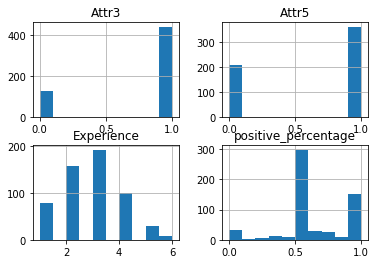

,positive_percentage,BU,Experience,Attr3,Age,Attr5,City,Attr7
0,0.578322,BU1,5.0,0.0,a4,1.0,Beijing,S14
1,1.000000,BU1,5.0,0.0,a4,1.0,Beijing,S14
2,0.500000,BU1,5.0,0.0,a4,1.0,Beijing,S14
3,1.000000,BU1,5.0,0.0,a4,1.0,Beijing,S14
4,0.500000,BU1,4.0,1.0,a4,1.0,Beijing,S14


In [254]:
jamDataValid.hist()
pl.show()
jamDataValid.head()

In [255]:
# Get the dummy variables from non-numeric fields and merge data
dummyBU = pd.get_dummies(jamDataValid['BU'])
dummyAge = pd.get_dummies(jamDataValid['Age'])
dummyCity = pd.get_dummies(jamDataValid['City'])
dummyCity.columns = ['Beijing', 'Guangzhou', 'Ningbo', 'Shanghai', 'Taipei', 'Xian']
dummyAttr7 = pd.get_dummies(jamDataValid['Attr7'])
colsFocus = ['positive_percentage', 'Experience', 'Attr3', 'Attr5']
dataMerge = jamDataValid[colsFocus].join(dummyBU.ix[:, 'BU10':])
dataMerge = dataMerge.join(dummyAge.ix[:, 'a1':])
dataMerge = dataMerge.join(dummyCity.ix[:, :'Taipei'])
# dataMerge = dataMerge.join(dummyAttr7.ix[:, 'S1':])
dataMerge.shape

(569, 29)

In [256]:
# choose traing valiable columns，except 'positive_percentage'
train_cols = dataMerge.columns[1:]
logit = sm.Logit(dataMerge['positive_percentage'], dataMerge[train_cols])
np.linalg.matrix_rank(dataMerge[train_cols].values)
# fitting model
result = logit.fit()
# dataMerge.columns

Optimization terminated successfully.
         Current function value: 0.630518
         Iterations 5


In [261]:
# result.conf_int()
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
stats.chisqprob(10,3)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     positive_percentage   No. Observations:                  569
Model:                           Logit   Df Residuals:                      541
Method:                            MLE   Df Model:                           27
Date:                 Tue, 12 Dec 2017   Pseudo R-squ.:                 0.01858
Time:                         17:56:26   Log-Likelihood:                -358.76
converged:                        True   LL-Null:                       -365.56
                                         LLR p-value:                    0.9850
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Experience     0.0448      0.153      0.293      0.769      -0.255       0.345
Attr3         -0.0253      0.273     -0.093      0.926      -0.561       0.510
Attr5         -0.0982      0.219     -0.449      0.654      -0.527       0.331
BU10          -0.2229      0.552     -0.404      0.686      -1.304       0.858
BU11           0.3055      0.545      0.560      0.575      -0.763       1.374
BU12          -0.0001      0.657     -0.000      1.000      -1.287       1.287
BU13           0.0483      0.505      0.096      0.924      -0.941       1.037
BU14          -0.5108      2.137     -0.239      0.811      -4.699       3.677
BU15          -0.3290      0.913     -0.360      0.719      -2.119       1.461
BU2           -0.2379      0.474     -0.502      0.615      -1.166       0.690
BU3           -0.2505      0.524     -0.478      0.633      -1.278       0.777
BU4           -0.2293      1.074     -0.213      0.831      -2.335       1.876
BU5            0.2584      0.480      0.538      0.591      -0.683       1.200
BU6            0.4274      0.613      0.698      0.485      -0.773       1.628
BU7           -0.1268      0.463     -0.274      0.784      -1.035       0.781
BU8            0.1340      0.819      0.164      0.870      -1.471       1.739
BU9            0.1891      0.518      0.365      0.715      -0.826       1.204
a1             0.9437      0.721      1.309      0.190      -0.469       2.356
a2             0.8558      0.734      1.166      0.243      -0.582       2.294
a3             1.0935      0.764      1.431      0.152      -0.404       2.591
a4             0.9353      0.852      1.098      0.272      -0.734       2.605
a5             0.8428      0.973      0.867      0.386      -1.063       2.749
a6             0.8742      1.127      0.776      0.438      -1.334       3.083
Beijing       -0.5340      0.641     -0.834      0.404      -1.789       0.721
Guangzhou     -0.5926      2.342     -0.253      0.800      -5.183       3.998
Ningbo        -0.2362      0.761     -0.310      0.756      -1.728       1.256
Shanghai      -0.2315      0.726     -0.319      0.750      -1.654       1.191
Taipei        -0.8436      0.757     -1.115      0.265      -2.326       0.639
==============================================================================
"""

In [ ]:
col_list = dataMerge.columns
for i in range(len(col_list)):
    for j in range(i+1, len(col_list)):
        if (dataMerge[col_list[i]] == dataMerge[col_list[j]]).sum() == 569:
            print (col_list[i], col_list[j]) 

In [ ]:
dataMerge.sum(axis=0).sort_values()

In [ ]:
dataMerge = dummyAttr7 
col_list = dataMerge.columns
for i in range(len(col_list)):
    for j in range(i+1, len(col_list)):
        if (dataMerge[col_list[i]] == dataMerge[col_list[j]]).sum() == 569:
            print (col_list[i], col_list[j]) 